In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from gurobipy import *
import pickle
from itertools import chain, combinations

In [2]:
df = pd.read_csv("data.csv", sep=";", index_col=0)

In [3]:
int_col =[str(i) for i in range(1,21)]

In [4]:
class Project:
    def __init__(self, num=0, desc=0, a1=0, a2=0, w=[1/2, 1/2], cost=1):
        self.num = num
        self.desc = desc
        self.a1 = a1
        self.a2 = a2    
        self.cost = cost
        self.w = w
                
    def cal_value(self):
        self.value = (self.a1/4)*self.w[0] + (self.a2/4)*self.w[1]
        
    def describe(self):
        print("Project " + self.desc)
        print("a1: ", self.a1)
        print("a2: ", self.a2)
        print("cost: ", self.cost)
        print("w: ", self.w)
        print("value: ", self.value)
        

In [5]:
project_list = []
for i in range(20):
    r = df.iloc[i]
    
    p = Project(num=i+1)
    p.desc = r["Action idea name"]
    p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
    p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
    p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
    p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
    p.cal_value()
    
    project_list.append(p)

In [6]:
df2 = pd.read_excel("inter_updated.xlsx", header=None)

In [7]:
score_list = []
for i in range(20):
    print("i: ", i)
    for j in range(i, 19):
        print("j: ",j)
        score = df2.iloc[i,j]
        if type(score) == str:
            score_list.append(score.replace(' ', ''))

i:  0
j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  1
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  2
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  3
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  4
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  5
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  6
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  7
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  8
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  9
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j

In [8]:
score_dict = {'+':0.33, '++': 0.66, '+++': 1, '+++(+)': (1+1.33)/2,'+/-':0, '-':-0.33, '0/+':(0.33/2) }

In [9]:
score_dict.keys()

dict_keys(['+', '++', '+++', '+++(+)', '+/-', '-', '0/+'])

In [10]:
score_dict.values()

dict_values([0.33, 0.66, 1, 1.165, 0, -0.33, 0.165])

In [11]:
score_df = pd.DataFrame()

In [12]:
score_df["effect"] = score_dict.keys()
score_df["gamma"] = score_dict.values()
score_df.to_csv("effect")

In [13]:
inter_subset = []
inter_effect = []

for i in range(20):
    for j in range(i, 19):
        score = df2.iloc[i,j]
        if type(score) == str:
            score = score.replace(' ', '')
            
            try:
                inter_effect.append(score_dict[score])
                inter_subset.append([i,j+1])
            except:
                pass

In [14]:
for i in range(len(inter_subset)):
    print(inter_subset[i])
    print(inter_effect[i])
    print()


[0, 3]
0.165

[0, 5]
0.165

[0, 11]
0.165

[1, 2]
0.66

[1, 3]
0.33

[1, 4]
0.66

[1, 5]
0

[1, 9]
0.66

[1, 11]
0.66

[1, 12]
1.165

[1, 14]
1

[1, 16]
0.66

[2, 3]
0.33

[2, 4]
0.33

[2, 6]
0.33

[2, 8]
0.33

[2, 19]
0.33

[3, 6]
0.33

[3, 8]
0.33

[3, 17]
0.33

[4, 12]
1

[4, 14]
1

[5, 12]
0.33

[5, 14]
0.66

[6, 7]
0.33

[6, 8]
1

[6, 9]
0.33

[6, 10]
0.33

[6, 12]
0.66

[6, 14]
0.66

[6, 16]
0.33

[7, 8]
1

[7, 9]
1

[7, 12]
0.33

[7, 14]
0.33

[8, 11]
0.33

[8, 14]
0.66

[8, 15]
-0.33

[8, 16]
0.33

[8, 17]
0.33

[8, 19]
0.33

[9, 11]
0.33

[9, 12]
0.33

[9, 14]
0.66

[9, 16]
0.33

[9, 17]
0.33

[9, 19]
0.33

[10, 11]
0.33

[10, 12]
0.33

[10, 13]
1

[10, 14]
0.33

[10, 15]
0.66

[10, 16]
0.33

[10, 17]
0.33

[10, 18]
0.33

[10, 19]
0.33

[11, 12]
1

[11, 13]
1

[11, 14]
0.66

[11, 15]
0.33

[11, 16]
0.33

[11, 17]
0.33

[11, 18]
0.33

[11, 19]
0.66

[12, 13]
1

[12, 14]
1

[12, 15]
1

[12, 18]
0.33

[12, 19]
0.66

[13, 14]
0.33

[13, 15]
1

[13, 19]
0.33

[14, 15]
1

[14, 16]
0

In [15]:
class SolveProblem:
    def __init__(self, budget_const_pct, inter_subset, inter_effect, project_list):
        self.budget_const_pct = budget_const_pct
        
        self.m = len(project_list)
        self.project_values = [x.value for x in project_list]
        self.project_costs = [x.cost for x in project_list] 
        
        self.optimal_portfolios = []
        self.optimal_values = []
        
        self.interaction_effects_dict = {}
        
        self.interaction_subsets = inter_subset
        self.inter_gamma = inter_effect
        
    def run(self):
        
        #A model that generates the first optimal solution
        model = Model("Portfolio opimization - Additive")   

        #Indexes
        projects = range(len(project_list))

        z = []

        for i in projects:
            z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
        model.update()

        #budget constraints
        self.budget = self.budget_const_pct * sum(self.project_costs)

        model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
        model.update()

        #objective function
        model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects))
        model.modelSense = GRB.MAXIMIZE
        model.update()

        #optimize the model
        model.optimize()

        #Collect optimal decision variables

        sol_dict = {}
        sol_list = model.getVars()
        
        for i in range(self.m):
            sol_dict[sol_list[i].VarName] = sol_list[i].X
        
        self.optimal_portfolios.append(sol_dict)
        self.optimal_values.append(model.objVal)
        
        for beta in list(np.arange(0, 1.2, 0.01)):
            
            self.interaction_effects = []

            for gamma in self.inter_gamma:
                print("gamma", gamma)
                S_k = gamma*0.73*beta
                print("S_k", S_k)
                self.interaction_effects.append(S_k)
                
            output = np.zeros((len(self.interaction_subsets), 20))
            for i, ix in enumerate(self.interaction_subsets):
                output[i][ix] = 1
            self.interaction_subsets_binary = output.T
            self.interaction_subsets_size = output.sum(axis=1)
            
            self.interaction_effects_dict[beta] = self.interaction_effects
            
                                    
            model = Model("Portfolio optimization - with interaction")

            J = self.m #rename the number of project for the simplicity
            
            #select interaction subsets that should be included in the model
            interaction_subsets = self.interaction_subsets
            interaction_subsets_binary = self.interaction_subsets_binary
            interaction_subsets_size = self.interaction_subsets_size
            interaction_effects= self.interaction_effects
    
            
            #Indexes for the model
            projects = range(J)
            interactions = range(len(self.interaction_subsets))

            #Decision variables z_j
            z = []
            for i in projects:
                z.append(model.addVar(vtype=GRB.BINARY, name="z_%d" % (i)))
            model.update()

            #Decision variable g_k
            g = []
            for k in interactions:
                g.append(model.addVar(vtype=GRB.BINARY, name="g_%d" % (k)))
            model.update()

            #budget constraints
            self.budget = self.budget_const_pct * sum(self.project_costs)

            model.addConstr(quicksum(z[j]*self.project_costs[j] for j in projects) <= self.budget, "Budget Constraint")
            model.update()

            #interaction constraints left hand side
            for k in interactions:
                model.addConstr(quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + 1 <= J*g[k])
            model.update()
            
            #interaction constraints right hand side
            for k in interactions:
                model.addConstr(J*g[k] <= quicksum(z[j]*interaction_subsets_binary[j][k] for j in projects) -
                               interaction_subsets_size[k] + J)
            model.update()
            
            #objective function
            model.setObjective(quicksum(z[j]*self.project_values[j] for j in projects) + quicksum(g[k]*interaction_effects[k] for k in interactions))

            model.modelSense = GRB.MAXIMIZE
            model.update()

            #optimize the model
            model.optimize()

            sol_dict = {}
            sol_list = model.getVars()
            for i in range(J + len(self.interaction_subsets)):
                sol_dict[sol_list[i].VarName] = sol_list[i].X
                
            self.optimal_portfolios.append(sol_dict)
            self.optimal_values.append(model.objVal)
            print("Beta: ", beta)
        
        
        return self.optimal_portfolios

In [16]:
def make_project(w):
    project_list = []
    for i in range(20):
        r = df.iloc[i]

        p = Project(num=i+1)
        p.desc = r["Action idea name"]
        p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
        p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
        p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
        p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
        p.w = w
        p.cal_value()

        project_list.append(p)
    return project_list

In [17]:
p1 = make_project([0.5, 0.5])
p2 = make_project([0.67, 0.33])
p3 = make_project([1,0])

In [18]:
s2 = SolveProblem(budget_const_pct=0.5, inter_subset=inter_subset, inter_effect=inter_effect, project_list=p2)
s2.run()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-06-08
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0xd73f89d9
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
Found heuristic solution: objective 7.7764000
Presolve removed 1 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 2: 8.33585 7.7764 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.335850000000e+00, best bound 8.335850000000e+00, gap 0.0000%
gamma 0.165
S_k 0.0
gamma 0.165
S_k 0.0
gamma 0.

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x44937ce6
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-03, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 7.8180770

Root relaxation: objective 8.655540e+00, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.65554    0   43    7.81808    8.65554  10.7%     -    0s
H    0     0                       8.4947570    8.6

  RLT: 16

Explored 1 nodes (75 simplex iterations) in 0.08 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 8.70979 8.68339 7.94393 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.709787000000e+00, best bound 8.709787000000e+00, gap 0.0000%
Beta:  0.04
gamma 0.165
S_k 0.0060225
gamma 0.165
S_k 0.0060225
gamma 0.165
S_k 0.0060225
gamma 0.66
S_k 0.02409
gamma 0.33
S_k 0.012045
gamma 0.66
S_k 0.02409
gamma 0
S_k 0.0
gamma 0.66
S_k 0.02409
gamma 0.66
S_k 0.02409
gamma 1.165
S_k 0.042522500000000005
gamma 1
S_k 0.0365
gamma 0.66
S_k 0.02409
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 1
S_k 0.0365
gamma 1
S_k 0.0365
gamma 0.33
S_k 0.012045
gamma 0.66
S_k 0.02409
gamma 0.33
S_k 0.012045
gamma 1
S_k 0.0365
gamma 0.33
S_k 0.012045
gamma 0.33
S_k 0.012045
gamma 0.66
S_k 0.02409


gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 1
S_k 0.051100000000000007
gamma 0.33
S_k 0.016863000000000003
gamma 0.66
S_k 0.033726000000000006
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 1
S_k 0.051100000000000007
gamma 1
S_k 0.051100000000000007
gamma 0.66
S_k 0.033726000000000006
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.33
S_k 0.016863000000000003
gamma 0.66
S_k 0.033726000000000006
gamma 1
S_k 0.051100000000000007
gamma 1
S_k 0.051100000000000007
gamma 1
S_k 0.051100000000000007
gamma 0.33
S_k 0.016863000000000003
gamma 0.66
S_k 0.033726000000000006
gamma 0.33
S_k 0.016863000000000003
gamma 1
S_k 0.051100000000000007
gamma 0.33
S_k 0.016863000000000003
gamma 1
S_k 0.051100000000000007
gamma 0.33
S_k 0

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x176f32a8
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 8.2585590

Root relaxation: objective 9.907972e+00, 22 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.90797    0   37    8.25856    9.90797  20.0%     -    0s
H    0     0                       9.3206145    9.


Cutting planes:
  Gomory: 8
  Cover: 34
  RLT: 17

Explored 1 nodes (129 simplex iterations) in 0.30 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 9.56495 9.55799 8.38441 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.564945500000e+00, best bound 9.564945500000e+00, gap 0.0000%
Beta:  0.11
gamma 0.165
S_k 0.014454
gamma 0.165
S_k 0.014454
gamma 0.165
S_k 0.014454
gamma 0.66
S_k 0.057816
gamma 0.33
S_k 0.028908
gamma 0.66
S_k 0.057816
gamma 0
S_k 0.0
gamma 0.66
S_k 0.057816
gamma 0.66
S_k 0.057816
gamma 1.165
S_k 0.102054
gamma 1
S_k 0.0876
gamma 0.66
S_k 0.057816
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 0.33
S_k 0.028908
gamma 1
S_k 0.0876
gamma 1
S_k 0.0876
gamma 0.33
S_k 0.028908
gamma 0.66
S_k 0.057816
gamma 0.33
S_k 0.028908
gamma 1
S_k 0.0876
gamma 0.33
S_k 0.028908
gamma 0.33
S_k


Solution count 3: 9.82641 8.51026 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 9.826411500000e+00, best bound 9.826411500000e+00, gap 0.0000%
Beta:  0.13
gamma 0.165
S_k 0.016863000000000003
gamma 0.165
S_k 0.016863000000000003
gamma 0.165
S_k 0.016863000000000003
gamma 0.66
S_k 0.06745200000000001
gamma 0.33
S_k 0.033726000000000006
gamma 0.66
S_k 0.06745200000000001
gamma 0
S_k 0.0
gamma 0.66
S_k 0.06745200000000001
gamma 0.66
S_k 0.06745200000000001
gamma 1.165
S_k 0.11906300000000002
gamma 1
S_k 0.10220000000000001
gamma 0.66
S_k 0.06745200000000001
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 0.33
S_k 0.033726000000000006
gamma 1
S_k 0.10220000000000001
gamma 1
S_k 0.10220000000000001
gamma 0.33
S_k 0.033726000000000006
gamma 0.66
S_k 0.0674520000


Solution count 3: 10.0948 8.63611 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.009483250000e+01, best bound 1.009483250000e+01, gap 0.0000%
Beta:  0.15
gamma 0.165
S_k 0.019272
gamma 0.165
S_k 0.019272
gamma 0.165
S_k 0.019272
gamma 0.66
S_k 0.077088
gamma 0.33
S_k 0.038544
gamma 0.66
S_k 0.077088
gamma 0
S_k 0.0
gamma 0.66
S_k 0.077088
gamma 0.66
S_k 0.077088
gamma 1.165
S_k 0.136072
gamma 1
S_k 0.1168
gamma 0.66
S_k 0.077088
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 1
S_k 0.1168
gamma 1
S_k 0.1168
gamma 0.33
S_k 0.038544
gamma 0.66
S_k 0.077088
gamma 0.33
S_k 0.038544
gamma 1
S_k 0.1168
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.66
S_k 0.077088
gamma 0.66
S_k 0.077088
gamma 0.33
S_k 0.038544
gamma 1
S_k 0.1168
gamma 1
S_k 0.1168
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 0.038544
gamma 0.33
S_k 

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x5a82c9ef
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 8.8248930

Root relaxation: objective 1.168368e+01, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   11.68368    0   38    8.82489   11.68368  32.4%     -    0s
H    0     0                      10.4974640   11.

     0     0   11.10648    0   25   10.76589   11.10648  3.16%     -    0s
     0     0   11.03407    0   16   10.76589   11.03407  2.49%     -    0s
     0     0   10.93692    0   25   10.76589   10.93692  1.59%     -    0s
     0     0   10.89149    0   24   10.76589   10.89149  1.17%     -    0s
     0     0   10.88308    0    3   10.76589   10.88308  1.09%     -    0s
     0     0   10.81664    0   50   10.76589   10.81664  0.47%     -    0s
     0     0     cutoff    0        10.76589   10.76589  0.00%     -    0s

Cutting planes:
  Gomory: 8
  Cover: 51
  MIR: 2
  Zero half: 1
  RLT: 19

Explored 1 nodes (232 simplex iterations) in 0.08 seconds (0.01 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 10.7659 8.95075 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.076588500000e+01, best bound 1.076588500000e+01, gap 0.0000%
Beta:  0.2
gamma 0.165
S_k 0.0252945
gamma 0.165
S_k 0.0252945
gamma 0.165
S_k 0.0252945
gamma 0.66
S_k 0.101

     0     0   11.13416    0   57   11.03431   11.13416  0.90%     -    0s
     0     0   11.06081    0    1   11.03431   11.06081  0.24%     -    0s
     0     0     cutoff    0        11.03431   11.03431  0.00%     -    0s

Cutting planes:
  Gomory: 9
  Cover: 48
  Zero half: 2
  RLT: 18

Explored 1 nodes (252 simplex iterations) in 0.21 seconds (0.01 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 11.0343 9.0766 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.103430600000e+01, best bound 1.103430600000e+01, gap 0.0000%
Beta:  0.22
gamma 0.165
S_k 0.027703500000000002
gamma 0.165
S_k 0.027703500000000002
gamma 0.165
S_k 0.027703500000000002
gamma 0.66
S_k 0.11081400000000001
gamma 0.33
S_k 0.055407000000000005
gamma 0.66
S_k 0.11081400000000001
gamma 0
S_k 0.0
gamma 0.66
S_k 0.11081400000000001
gamma 0.66
S_k 0.11081400000000001
gamma 1.165
S_k 0.1956035
gamma 1
S_k 0.1679
gamma 0.66
S_k 0.11081400000000001
gamma 0.33
S_k 0.0554070

     0     0   11.79955    0   17   11.30273   11.79955  4.40%     -    0s
     0     0   11.56407    0   30   11.30273   11.56407  2.31%     -    0s
     0     0   11.50637    0   44   11.30273   11.50637  1.80%     -    0s
     0     0   11.48825    0    3   11.30273   11.48825  1.64%     -    0s
     0     0   11.41564    0   41   11.30273   11.41564  1.00%     -    0s
     0     0   11.37491    0   45   11.30273   11.37491  0.64%     -    0s
     0     0   11.33502    0   31   11.30273   11.33502  0.29%     -    0s
     0     0   11.32694    0   25   11.30273   11.32694  0.21%     -    0s
     0     0   11.31609    0   26   11.30273   11.31609  0.12%     -    0s
     0     0     cutoff    0        11.30273   11.30273  0.00%     -    0s

Cutting planes:
  Gomory: 13
  Cover: 50
  MIR: 1
  Zero half: 1
  RLT: 20

Explored 1 nodes (270 simplex iterations) in 0.23 seconds (0.01 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 11.3027 9.20245 3.46778 

Optim

Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 9.3283010

Root relaxation: objective 1.328457e+01, 51 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.28457    0   38    9.32830   13.28457  42.4%     -    0s
H    0     0                      11.5711480   13.28457  14.8%     -    0s
     0     0   12.10269    0   18   11.57115   12.10269  4.59%     -    0s
     0     0   12.02892    0   30   11.57115   12.02892  3.96%     -    0s
     0     0   12.02550    0   36   11.57115   12.02550  3.93%     -    0s
     0     0   11.79547    0   31   11.57115   11.79547  1.94%     -    0s
     0     0   11.76550    0   58   11.57115   11.76550  1.68%     -    0s
     0     0   11.75376    0   24   11.57115   11.75376  1.58%     -    0s
     0     0   11.73591    0   48   11.57115   11.73591  1.

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x7af62c87
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 9.4541530

Root relaxation: objective 1.370051e+01, 55 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.70051    0   38    9.45415   13.70051  44.9%     -    0s
H    0     0                      11.8215630   13.

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0xbc95659d
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 9.5800050

Root relaxation: objective 1.411789e+01, 62 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.11789    0   38    9.58000   14.11789  47.4%   

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0xe67f64f9
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 9.7058570

Root relaxation: objective 1.453526e+01, 62 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.53526    0   38    9.70586   14.53526  49.8%   

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x6d3ae63f
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 9.8317090

Root relaxation: objective 1.495264e+01, 66 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.95264    0   38    9.83171   14.95264  52.1%     -    0s
H    0     0                      12.6710640   14.

S_k 0.2628
gamma 1
S_k 0.2628
gamma 0.66
S_k 0.173448
gamma 0.33
S_k 0.086724
gamma 0.33
S_k 0.086724
gamma 0.33
S_k 0.086724
gamma 0.33
S_k 0.086724
gamma 0.66
S_k 0.173448
gamma 1
S_k 0.2628
gamma 1
S_k 0.2628
gamma 1
S_k 0.2628
gamma 0.33
S_k 0.086724
gamma 0.66
S_k 0.173448
gamma 0.33
S_k 0.086724
gamma 1
S_k 0.2628
gamma 0.33
S_k 0.086724
gamma 1
S_k 0.2628
gamma 0.33
S_k 0.086724
gamma 0.33
S_k 0.086724
gamma 0.66
S_k 0.173448
gamma -0.33
S_k -0.086724
gamma 0.66
S_k 0.173448
gamma 0.33
S_k 0.086724
gamma 0.33
S_k 0.086724
gamma 1
S_k 0.2628
gamma 0.33
S_k 0.086724
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x31153d7f
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range   

gamma 1
S_k 0.2774
gamma 0.33
S_k 0.091542
gamma 1
S_k 0.2774
gamma 0.33
S_k 0.091542
gamma 0.33
S_k 0.091542
gamma 0.66
S_k 0.183084
gamma -0.33
S_k -0.091542
gamma 0.66
S_k 0.183084
gamma 0.33
S_k 0.091542
gamma 0.33
S_k 0.091542
gamma 1
S_k 0.2774
gamma 0.33
S_k 0.091542
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x9aec21c8
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 10.0834130

Root relaxation: objective 1

gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 1
S_k 0.292
gamma 0.33
S_k 0.09636
gamma 0.66
S_k 0.19272
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 1
S_k 0.292
gamma 1
S_k 0.292
gamma 0.66
S_k 0.19272
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 0.66
S_k 0.19272
gamma 1
S_k 0.292
gamma 1
S_k 0.292
gamma 1
S_k 0.292
gamma 0.33
S_k 0.09636
gamma 0.66
S_k 0.19272
gamma 0.33
S_k 0.09636
gamma 1
S_k 0.292
gamma 0.33
S_k 0.09636
gamma 1
S_k 0.292
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 0.66
S_k 0.19272
gamma -0.33
S_k -0.09636
gamma 0.66
S_k 0.19272
gamma 0.33
S_k 0.09636
gamma 0.33
S_k 0.09636
gamma 1
S_k 0.292
gamma 0.33
S_k 0.09636
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x1c6724ce
Variable ty

     0     0   13.72994    0   40   13.66215   13.72994  0.50%     -    0s
     0     0     cutoff    0        13.66215   13.66215  0.00%     -    0s

Cutting planes:
  Gomory: 5
  Cover: 52
  Clique: 3
  MIR: 1
  Zero half: 1
  RLT: 30
  BQP: 1

Explored 1 nodes (508 simplex iterations) in 0.12 seconds (0.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 3: 13.6621 10.2722 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.366214850000e+01, best bound 1.366214850000e+01, gap 0.0000%
Beta:  0.41000000000000003
gamma 0.165
S_k 0.050589
gamma 0.165
S_k 0.050589
gamma 0.165
S_k 0.050589
gamma 0.66
S_k 0.202356
gamma 0.33
S_k 0.101178
gamma 0.66
S_k 0.202356
gamma 0
S_k 0.0
gamma 0.66
S_k 0.202356
gamma 0.66
S_k 0.202356
gamma 1.165
S_k 0.357189
gamma 1
S_k 0.3066
gamma 0.66
S_k 0.202356
gamma 0.33
S_k 0.101178
gamma 0.33
S_k 0.101178
gamma 0.33
S_k 0.101178
gamma 0.33
S_k 0.101178
gamma 0.33
S_k 0.101178
gamma 0.33
S_k 0.101178
gamma 0.33
S_

     0     0   14.93581    0   37   13.94532   14.93581  7.10%     -    0s
     0     0   14.91869    0   48   13.94532   14.91869  6.98%     -    0s
     0     0   14.91609    0   42   13.94532   14.91609  6.96%     -    0s
     0     0   14.47143    0    8   13.94532   14.47143  3.77%     -    0s
     0     0   14.28006    0   74   13.94532   14.28006  2.40%     -    0s
     0     0   14.23828    0   43   13.94532   14.23828  2.10%     -    0s
     0     0   14.23448    0   68   13.94532   14.23448  2.07%     -    0s
     0     0   14.22628    0   73   13.94532   14.22628  2.01%     -    0s
     0     0   14.07489    0   36   13.94532   14.07489  0.93%     -    0s
     0     0   14.05000    0   58   13.94532   14.05000  0.75%     -    0s
     0     0   14.04763    0   58   13.94532   14.04763  0.73%     -    0s
     0     0   14.04762    0   58   13.94532   14.04762  0.73%     -    0s
     0     0   14.02542    0   54   13.94532   14.02542  0.57%     -    0s
     0     0   14.02395  

gamma 1
S_k 0.3285
gamma 0.33
S_k 0.108405
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x78da0318
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [5e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 10.5238950

Root relaxation: objective 1.724822e+01, 88 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   17.248

Thread count was 4 (of 4 available processors)

Solution count 3: 14.3701 10.5868 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.437006600000e+01, best bound 1.437006600000e+01, gap 0.0000%
Beta:  0.46
gamma 0.165
S_k 0.0566115
gamma 0.165
S_k 0.0566115
gamma 0.165
S_k 0.0566115
gamma 0.66
S_k 0.226446
gamma 0.33
S_k 0.113223
gamma 0.66
S_k 0.226446
gamma 0
S_k 0.0
gamma 0.66
S_k 0.226446
gamma 0.66
S_k 0.226446
gamma 1.165
S_k 0.39971150000000005
gamma 1
S_k 0.3431
gamma 0.66
S_k 0.226446
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 1
S_k 0.3431
gamma 1
S_k 0.3431
gamma 0.33
S_k 0.113223
gamma 0.66
S_k 0.226446
gamma 0.33
S_k 0.113223
gamma 1
S_k 0.3431
gamma 0.33
S_k 0.113223
gamma 0.33
S_k 0.113223
gamma 0.66
S_k 0.226446
gamma 0.66
S_k 0.226446
gamma 0.33
S_k 0.113223
gamma 1
S_k 0.3431
gamma 1
S_k 0.3431
ga

     0     0   14.80653    0   81   14.65323   14.80653  1.05%     -    0s
     0     0   14.77963    0   20   14.65323   14.77963  0.86%     -    0s
     0     0   14.77880    0   34   14.65323   14.77880  0.86%     -    0s
     0     0   14.72959    0   27   14.65323   14.72959  0.52%     -    0s
     0     0   14.69504    0   59   14.65323   14.69504  0.29%     -    0s
     0     0   14.69438    0    2   14.65323   14.69438  0.28%     -    0s
     0     0   14.69413    0   59   14.65323   14.69413  0.28%     -    0s
     0     0   14.69413    0   59   14.65323   14.69413  0.28%     -    0s
     0     0     cutoff    0        14.65323   14.65323  0.00%     -    0s

Explored 1 nodes (565 simplex iterations) in 0.12 seconds (0.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 14.6532 14.4823 10.7127 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.465323300000e+01, best bound 1.465323300000e+01, gap 0.0000%
Beta:  0.48
gamma 0.165
S_

Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x8b363978
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 10.8385250

Root relaxation: objective 1.829166e+01, 96 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   18.29166    0   38   10.83852   18.29166  68.8%     -    0s
H    0     0                      14.9364000   18.29166  22.5%     -    0s
     0     0   16.34770    0   46   14.93640   16.

     0     0   15.11876    0   86   15.07798   15.11876  0.27%     -    0s
     0     0   15.11876    0   86   15.07798   15.11876  0.27%     -    0s
     0     0   15.11876    0   16   15.07798   15.11876  0.27%     -    0s
     0     0     cutoff    0        15.07798   15.07798  0.00%     -    0s

Cutting planes:
  Gomory: 2
  MIR: 1
  Mod-K: 2
  RLT: 11
  BQP: 2

Explored 1 nodes (584 simplex iterations) in 0.16 seconds (0.03 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 15.078 13.8432 10.9015 3.46778 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.507798350000e+01, best bound 1.507798350000e+01, gap 0.0000%
Beta:  0.51
gamma 0.165
S_k 0.06263400000000001
gamma 0.165
S_k 0.06263400000000001
gamma 0.165
S_k 0.06263400000000001
gamma 0.66
S_k 0.25053600000000004
gamma 0.33
S_k 0.12526800000000002
gamma 0.66
S_k 0.25053600000000004
gamma 0
S_k 0.0
gamma 0.66
S_k 0.25053600000000004
gamma 0.66
S_k 0.25053600000000004
gamma 1.165
S_k 0.44223

gamma 0.33
S_k 0.127677
gamma 0.33
S_k 0.127677
gamma 0.66
S_k 0.255354
gamma -0.33
S_k -0.127677
gamma 0.66
S_k 0.255354
gamma 0.33
S_k 0.127677
gamma 0.33
S_k 0.127677
gamma 1
S_k 0.3869
gamma 0.33
S_k 0.127677
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x3911530f
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 11.0273030

Root relaxation: objective 1.891773e+01, 88 iterations, 0.00 seconds (0.00 work units)

  

     0     0   15.60015    0   81   15.51516   15.60015  0.55%     -    0s
     0     0   15.59461    0   49   15.51516   15.59461  0.51%     -    0s
     0     0   15.58369    0   63   15.51516   15.58369  0.44%     -    0s
     0     0   15.58220    0   84   15.51516   15.58220  0.43%     -    0s
     0     0   15.57885    0   63   15.51516   15.57885  0.41%     -    0s
     0     0   15.57866    0   67   15.51516   15.57866  0.41%     -    0s
     0     0   15.57822    0   61   15.51516   15.57822  0.41%     -    0s
     0     0   15.57822    0   61   15.51516   15.57822  0.41%     -    0s
     0     0   15.57822    0   20   15.51516   15.57822  0.41%     -    0s
     0     0   15.57053    0   22   15.51516   15.57053  0.36%     -    0s
     0     0   15.53761    0   18   15.51516   15.53761  0.14%     -    0s

Cutting planes:
  Gomory: 1
  RLT: 11

Explored 1 nodes (674 simplex iterations) in 0.21 seconds (0.03 work units)
Thread count was 4 (of 4 available processors)

Solution co

S_k 0.13490400000000002
gamma 1
S_k 0.40880000000000005
gamma 0.33
S_k 0.13490400000000002
gamma 0.33
S_k 0.13490400000000002
gamma 0.66
S_k 0.26980800000000005
gamma -0.33
S_k -0.13490400000000002
gamma 0.66
S_k 0.26980800000000005
gamma 0.33
S_k 0.13490400000000002
gamma 0.33
S_k 0.13490400000000002
gamma 1
S_k 0.40880000000000005
gamma 0.33
S_k 0.13490400000000002
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x848e298d
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 in

     0     0   16.03847    0   20   15.97626   16.03847  0.39%     -    0s
     0     0     cutoff    0        15.97626   15.97626  0.00%     -    0s

Cutting planes:
  Gomory: 1
  Zero half: 1
  Mod-K: 3
  RLT: 10

Explored 1 nodes (491 simplex iterations) in 0.14 seconds (0.03 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 15.9763 15.9275 15.8153 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 1.597626050000e+01, best bound 1.597626050000e+01, gap 0.0000%
Beta:  0.5700000000000001
gamma 0.165
S_k 0.06986099999999999
gamma 0.165
S_k 0.06986099999999999
gamma 0.165
S_k 0.06986099999999999
gamma 0.66
S_k 0.27944399999999997
gamma 0.33
S_k 0.13972199999999999
gamma 0.66
S_k 0.27944399999999997
gamma 0
S_k 0.0
gamma 0.66
S_k 0.27944399999999997
gamma 0.66
S_k 0.27944399999999997
gamma 1.165
S_k 0.493261
gamma 1
S_k 0.42339999999999994
gamma 0.66
S_k 0.27944399999999997
gamma 0.33
S_k 0.13972199999999999
gamma 0.33
S_k 0.13972199999999

S_k 0.142131
gamma 1
S_k 0.43069999999999997
gamma 0.33
S_k 0.142131
gamma 0.33
S_k 0.142131
gamma 0.66
S_k 0.284262
gamma -0.33
S_k -0.142131
gamma 0.66
S_k 0.284262
gamma 0.33
S_k 0.142131
gamma 0.33
S_k 0.142131
gamma 1
S_k 0.43069999999999997
gamma 0.33
S_k 0.142131
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0xed4bb428
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 11.4048590

Root relaxation: objective 2.016

  Mod-K: 4
  RLT: 10
  BQP: 1

Explored 1 nodes (591 simplex iterations) in 0.14 seconds (0.03 work units)
Thread count was 4 (of 4 available processors)

Solution count 6: 16.4374 16.3522 16.2804 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 1.643736500000e+01, best bound 1.643736500000e+01, gap 0.0000%
Beta:  0.6
gamma 0.165
S_k 0.0734745
gamma 0.165
S_k 0.0734745
gamma 0.165
S_k 0.0734745
gamma 0.66
S_k 0.293898
gamma 0.33
S_k 0.146949
gamma 0.66
S_k 0.293898
gamma 0
S_k 0.0
gamma 0.66
S_k 0.293898
gamma 0.66
S_k 0.293898
gamma 1.165
S_k 0.5187745
gamma 1
S_k 0.4453
gamma 0.66
S_k 0.293898
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma 1
S_k 0.4453
gamma 1
S_k 0.4453
gamma 0.33
S_k 0.146949
gamma 0.66
S_k 0.293898
gamma 0.33
S_k 0.146949
gamma 1
S_k 0.4453
gamma 0.33
S_k 0.146949
gamma 0.33
S_k 0.146949
gamma

     0     0   17.69922    0   47   16.63540   17.69922  6.39%     -    0s
     0     0   17.59250    0   82   16.63540   17.59250  5.75%     -    0s
     0     0   17.54977    0   79   16.63540   17.54977  5.50%     -    0s
     0     0   17.31592    0   64   16.63540   17.31592  4.09%     -    0s
     0     0   17.00736    0   62   16.63540   17.00736  2.24%     -    0s
     0     0   16.99258    0   56   16.63540   16.99258  2.15%     -    0s
     0     0   16.96218    0   56   16.63540   16.96218  1.96%     -    0s
     0     0   16.95497    0   34   16.63540   16.95497  1.92%     -    0s
     0     0   16.95468    0   56   16.63540   16.95468  1.92%     -    0s
     0     0   16.92869    0   27   16.63540   16.92869  1.76%     -    0s
     0     0   16.86907    0   82   16.63540   16.86907  1.40%     -    0s
     0     0   16.86496    0   85   16.63540   16.86496  1.38%     -    0s
     0     0   16.86290    0   90   16.63540   16.86290  1.37%     -    0s
     0     0   16.83227  

S_k 0.4672
gamma 0.33
S_k 0.154176
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x7b8cfc62
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [8e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 11.7194890

Root relaxation: objective 2.121330e+01, 105 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   21.21330    0

S_k 0.4818
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.66
S_k 0.317988
gamma 0.66
S_k 0.317988
gamma 0.33
S_k 0.158994
gamma 1
S_k 0.4818
gamma 1
S_k 0.4818
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.66
S_k 0.317988
gamma -0.33
S_k -0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.66
S_k 0.317988
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 1
S_k 0.4818
gamma 0.33
S_k 0.158994
gamma 0.66
S_k 0.317988
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 1
S_k 0.4818
gamma 1
S_k 0.4818
gamma 0.66
S_k 0.317988
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.33
S_k 0.158994
gamma 0.66
S_k 0.317988
gamma 1
S_k 0.4818
gamma 1
S_k 0.4818
gamma 1
S_k 0.4818
gamma 0.33
S_k 0.158994
gamma 0.66
S_k 0.31

H    0     0                      17.3433195   21.83937  25.9%     -    0s
     0     0   19.34383    0   40   17.34332   19.34383  11.5%     -    0s
     0     0   19.01148    0   56   17.34332   19.01148  9.62%     -    0s
     0     0   18.97041    0   59   17.34332   18.97041  9.38%     -    0s
     0     0   18.04190    0   83   17.34332   18.04190  4.03%     -    0s
     0     0   17.98115    0   59   17.34332   17.98115  3.68%     -    0s
     0     0   17.90677    0   70   17.34332   17.90677  3.25%     -    0s
     0     0   17.90037    0    4   17.34332   17.90037  3.21%     -    0s
     0     0   17.88100    0   69   17.34332   17.88100  3.10%     -    0s
     0     0   17.84630    0   54   17.34332   17.84630  2.90%     -    0s
     0     0   17.83815    0   65   17.34332   17.83815  2.85%     -    0s
     0     0   17.65141    0   71   17.34332   17.65141  1.78%     -    0s
H    0     0                      17.4836385   17.65141  0.96%     -    0s
     0     0   17.63638  

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x4e1b9ea4
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [8e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 12.0341190

Root relaxation: objective 2.225675e+01, 109 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.25675    0   38   12.03412   22.25675  84.9% 

     0     0   17.99965    0   10   17.97438   17.99965  0.14%     -    0s
     0     0 infeasible    0        17.97438   17.97438  0.00%     -    0s

Cutting planes:
  Gomory: 1
  Mod-K: 1
  RLT: 6

Explored 1 nodes (488 simplex iterations) in 0.17 seconds (0.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 17.9744 17.7681 17.0428 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 1.797438000000e+01, best bound 1.797438000000e+01, gap 0.0000%
Beta:  0.7000000000000001
gamma 0.165
S_k 0.0855195
gamma 0.165
S_k 0.0855195
gamma 0.165
S_k 0.0855195
gamma 0.66
S_k 0.342078
gamma 0.33
S_k 0.171039
gamma 0.66
S_k 0.342078
gamma 0
S_k 0.0
gamma 0.66
S_k 0.342078
gamma 0.66
S_k 0.342078
gamma 1.165
S_k 0.6038195
gamma 1
S_k 0.5183
gamma 0.66
S_k 0.342078
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.171039
gamma 0.33
S_k 0.17103

     0     0   20.09857    0   51   17.88727   20.09857  12.4%     -    0s
     0     0   19.15428    0    6   17.88727   19.15428  7.08%     -    0s
H    0     0                      18.2817830   19.15428  4.77%     -    0s
     0     0   18.82697    0   26   18.28178   18.82697  2.98%     -    0s
     0     0   18.82697    0   27   18.28178   18.82697  2.98%     -    0s
     0     0   18.66379    0   62   18.28178   18.66379  2.09%     -    0s
     0     0   18.56583    0   67   18.28178   18.56583  1.55%     -    0s
     0     0   18.53749    0   63   18.28178   18.53749  1.40%     -    0s
     0     0   18.52650    0   57   18.28178   18.52650  1.34%     -    0s
     0     0   18.36788    0   49   18.28178   18.36788  0.47%     -    0s
     0     0   18.34542    0   62   18.28178   18.34542  0.35%     -    0s
     0     0 infeasible    0        18.28178   18.28178  0.00%     -    0s

Explored 1 nodes (458 simplex iterations) in 0.10 seconds (0.02 work units)
Thread count was 4 (of 

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x994424f3
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [9e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 12.3487490

Root relaxation: objective 2.331902e+01, 102 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   23.31902    0   41   12.34875   23.31902  88.8% 

S_k 0.366168
gamma 0.33
S_k 0.183084
gamma 1
S_k 0.5548
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.66
S_k 0.366168
gamma 0.66
S_k 0.366168
gamma 0.33
S_k 0.183084
gamma 1
S_k 0.5548
gamma 1
S_k 0.5548
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.66
S_k 0.366168
gamma -0.33
S_k -0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.66
S_k 0.366168
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 1
S_k 0.5548
gamma 0.33
S_k 0.183084
gamma 0.66
S_k 0.366168
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 1
S_k 0.5548
gamma 1
S_k 0.5548
gamma 0.66
S_k 0.366168
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.33
S_k 0.183084
gamma 0.66
S_k 0.366168
gamma 1
S_k 0.5548
gamma 1
S_k 0.5548
gamma 1
S_k 0.554

H    0     0                      18.3271175   21.21697  15.8%     -    0s
     0     0   20.91703    0   53   18.32712   20.91703  14.1%     -    0s
     0     0   20.90645    0   30   18.32712   20.90645  14.1%     -    0s
     0     0   20.13757    0   51   18.32712   20.13757  9.88%     -    0s
     0     0   19.90126    0   61   18.32712   19.90126  8.59%     -    0s
     0     0   19.83886    0   67   18.32712   19.83886  8.25%     -    0s
     0     0   19.82263    0   85   18.32712   19.82263  8.16%     -    0s
     0     0   19.81523    0   55   18.32712   19.81523  8.12%     -    0s
     0     0   19.55323    0   74   18.32712   19.55323  6.69%     -    0s
H    0     0                      19.0502905   19.55323  2.64%     -    0s
     0     0   19.38938    0   31   19.05029   19.38938  1.78%     -    0s
     0     0   19.35399    0   54   19.05029   19.35399  1.59%     -    0s
     0     0   19.34668    0   30   19.05029   19.34668  1.56%     -    0s
     0     0   19.32798  

S_k 0.190311
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x479a26ec
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 12.6633790

Root relaxation: objective 2.438637e+01, 112 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   24.38637    0   41   12.66338   24.

gamma 1
S_k 0.5913
gamma 0.33
S_k 0.19512900000000002
gamma 0.66
S_k 0.39025800000000005
gamma 0.33
S_k 0.19512900000000002
gamma 1
S_k 0.5913
gamma 0.33
S_k 0.19512900000000002
gamma 1
S_k 0.5913
gamma 0.33
S_k 0.19512900000000002
gamma 0.33
S_k 0.19512900000000002
gamma 0.66
S_k 0.39025800000000005
gamma -0.33
S_k -0.19512900000000002
gamma 0.66
S_k 0.39025800000000005
gamma 0.33
S_k 0.19512900000000002
gamma 0.33
S_k 0.19512900000000002
gamma 1
S_k 0.5913
gamma 0.33
S_k 0.19512900000000002
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x129ca0e0
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve remov

     0     0   19.93151    0   53   19.22786   19.93151  3.66%     -    0s
H    0     0                      19.5691580   19.93151  1.85%     -    0s
H    0     0                      19.8187980   19.93151  0.57%     -    0s
     0     0   19.90682    0   53   19.81880   19.90682  0.44%     -    0s
     0     0   19.90582    0   53   19.81880   19.90582  0.44%     -    0s
     0     0   19.87838    0   56   19.81880   19.87838  0.30%     -    0s
H    0     0                      19.8636210   19.87838  0.07%     -    0s
     0     0     cutoff    0        19.86362   19.86362  0.00%     -    0s

Cutting planes:
  Gomory: 22
  Cover: 55
  Zero half: 2
  RLT: 32
  BQP: 9

Explored 1 nodes (475 simplex iterations) in 0.21 seconds (0.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 8: 19.8636 19.8188 19.5692 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 1.986362100000e+01, best bound 1.986362100000e+01, gap 0.0000%
Beta:  0.8200000000000

Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 12.9780090

Root relaxation: objective 2.545373e+01, 118 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   25.45373    0   41   12.97801   25.45373  96.1%     -    0s
H    0     0                      19.2067510   25.45373  32.5%     -    0s
     0     0   22.39939    0   61   19.20675   22.39939  16.6%     -    0s
H    0     0                      19.6517770   22.39939  14.0%     -    0s
     0     0   21.97452    0   19   19.65178 

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x469d903b
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 13.1038610

Root relaxation: objective 2.588067e+01, 114 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   25.88067    0   41   13.10386   25.88067  97.5% 

gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 1
S_k 0.6424
gamma 0.33
S_k 0.211992
gamma 0.66
S_k 0.423984
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 1
S_k 0.6424
gamma 1
S_k 0.6424
gamma 0.66
S_k 0.423984
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.66
S_k 0.423984
gamma 1
S_k 0.6424
gamma 1
S_k 0.6424
gamma 1
S_k 0.6424
gamma 0.33
S_k 0.211992
gamma 0.66
S_k 0.423984
gamma 0.33
S_k 0.211992
gamma 1
S_k 0.6424
gamma 0.33
S_k 0.211992
gamma 1
S_k 0.6424
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 0.66
S_k 0.423984
gamma -0.33
S_k -0.211992
gamma 0.66
S_k 0.423984
gamma 0.33
S_k 0.211992
gamma 0.33
S_k 0.211992
gamma 1
S_k 0.6424
gamma 0.33
S_k 0.211992
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns

Thread count was 4 (of 4 available processors)

Solution count 7: 20.9743 20.7438 20.6719 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 2.097427950000e+01, best bound 2.097427950000e+01, gap 0.0000%
Beta:  0.89
gamma 0.165
S_k 0.108405
gamma 0.165
S_k 0.108405
gamma 0.165
S_k 0.108405
gamma 0.66
S_k 0.43362
gamma 0.33
S_k 0.21681
gamma 0.66
S_k 0.43362
gamma 0
S_k 0.0
gamma 0.66
S_k 0.43362
gamma 0.66
S_k 0.43362
gamma 1.165
S_k 0.765405
gamma 1
S_k 0.657
gamma 0.66
S_k 0.43362
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 1
S_k 0.657
gamma 1
S_k 0.657
gamma 0.33
S_k 0.21681
gamma 0.66
S_k 0.43362
gamma 0.33
S_k 0.21681
gamma 1
S_k 0.657
gamma 0.33
S_k 0.21681
gamma 0.33
S_k 0.21681
gamma 0.66
S_k 0.43362
gamma 0.66
S_k 0.43362
gamma 0.33
S_k 0.21681
gamma 1
S_k 0.657
gamma 1
S_k 0.657
gamma 0.33
S_k 0.21681
gamma 0.33

     0     0   21.68860    0   25   21.20211   21.68860  2.29%     -    0s
H    0     0                      21.2916105   21.68860  1.86%     -    0s
     0     0   21.52783    0   53   21.29161   21.52783  1.11%     -    0s
     0     0   21.52731    0   35   21.29161   21.52731  1.11%     -    0s
     0     0   21.34829    0   30   21.29161   21.34829  0.27%     -    0s
     0     0   21.33924    0   52   21.29161   21.33924  0.22%     -    0s
     0     0   21.32141    0   52   21.29161   21.32141  0.14%     -    0s

Cutting planes:
  Gomory: 13
  Cover: 53
  MIR: 1
  Zero half: 9
  RLT: 31

Explored 1 nodes (473 simplex iterations) in 0.23 seconds (0.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 5: 21.2916 21.2021 20.1805 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 2.129161050000e+01, best bound 2.129161050000e+01, gap 0.0000%
Beta:  0.91
gamma 0.165
S_k 0.11081400000000001
gamma 0.165
S_k 0.11081400000000001
gamma 0.165
S

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x9b373b61
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 13.5443430

Root relaxation: objective 2.737496e+01, 114 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.37496    0   41   13.54434   27.37496   102%     -    0s
H    0     0                      20.4586645   2

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x3a583e66
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 13.6701950

Root relaxation: objective 2.780190e+01, 119 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   27.80190    0   41   13.67019   27.80190   103% 

Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x96500f97
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 13.7960470

Root relaxation: objective 2.822884e+01, 119 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   28.22884    0   41   13.79605   28.22884   105%     -    0s
H    0     0                      21.0150705   2

gamma -0.33
S_k -0.238491
gamma 0.66
S_k 0.476982
gamma 0.33
S_k 0.238491
gamma 0.33
S_k 0.238491
gamma 1
S_k 0.7227
gamma 0.33
S_k 0.238491
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0xaa26dc73
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 16.1087270

Root relaxation: objective 2.865578e+01, 118 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work


gamma 0.33
S_k 0.243309
gamma 1
S_k 0.7373
gamma 0.33
S_k 0.243309
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x3d11a75d
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 16.2731230

Root relaxation: objective 2.908272e+01, 119 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x7d3a9064
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 16.4375190

Root relaxation: objective 2.950966e+01, 118 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   29.50966    0   41   16.43752   29.50966  79.5% 

gamma 0.66
S_k 0.5058900000000001
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 1
S_k 0.7665
gamma 0.33
S_k 0.25294500000000003
gamma 0.66
S_k 0.5058900000000001
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 1
S_k 0.7665
gamma 1
S_k 0.7665
gamma 0.66
S_k 0.5058900000000001
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.66
S_k 0.5058900000000001
gamma 1
S_k 0.7665
gamma 1
S_k 0.7665
gamma 1
S_k 0.7665
gamma 0.33
S_k 0.25294500000000003
gamma 0.66
S_k 0.5058900000000001
gamma 0.33
S_k 0.25294500000000003
gamma 1
S_k 0.7665
gamma 0.33
S_k 0.25294500000000003
gamma 1
S_k 0.7665
gamma 0.33
S_k 0.25294500000000003
gamma 0.33
S_k 0.25294500000000003
gamma 0.66
S_


Optimal solution found (tolerance 1.00e-04)
Best objective 2.367159300000e+01, best bound 2.367159300000e+01, gap 0.0000%
Beta:  1.06
gamma 0.165
S_k 0.1288815
gamma 0.165
S_k 0.1288815
gamma 0.165
S_k 0.1288815
gamma 0.66
S_k 0.515526
gamma 0.33
S_k 0.257763
gamma 0.66
S_k 0.515526
gamma 0
S_k 0.0
gamma 0.66
S_k 0.515526
gamma 0.66
S_k 0.515526
gamma 1.165
S_k 0.9099815000000001
gamma 1
S_k 0.7811
gamma 0.66
S_k 0.515526
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 1
S_k 0.7811
gamma 1
S_k 0.7811
gamma 0.33
S_k 0.257763
gamma 0.66
S_k 0.515526
gamma 0.33
S_k 0.257763
gamma 1
S_k 0.7811
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.66
S_k 0.515526
gamma 0.66
S_k 0.515526
gamma 0.33
S_k 0.257763
gamma 1
S_k 0.7811
gamma 1
S_k 0.7811
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.33
S_k 0.257763
gamma 0.66
S_k 0.51552

     0     0   24.08050    0   87   23.03620   24.08050  4.53%     -    0s
H    0     0                      23.5176460   24.08050  2.39%     -    0s
H    0     0                      23.6772620   24.08050  1.70%     -    0s
     0     0   23.99740    0   57   23.67726   23.99740  1.35%     -    0s
*    0     0               0      23.9889240   23.98892  0.00%     -    0s

Cutting planes:
  Gomory: 19
  Cover: 53
  Zero half: 4
  RLT: 29
  BQP: 1

Explored 1 nodes (492 simplex iterations) in 0.18 seconds (0.02 work units)
Thread count was 4 (of 4 available processors)

Solution count 8: 23.9889 23.6773 23.5176 ... 3.46778

Optimal solution found (tolerance 1.00e-04)
Best objective 2.398892400000e+01, best bound 2.398892400000e+01, gap 0.0000%
Beta:  1.08
gamma 0.165
S_k 0.1312905
gamma 0.165
S_k 0.1312905
gamma 0.165
S_k 0.1312905
gamma 0.66
S_k 0.525162
gamma 0.33
S_k 0.262581
gamma 0.66
S_k 0.525162
gamma 0
S_k 0.0
gamma 0.66
S_k 0.525162
gamma 0.66
S_k 0.525162
gamma 1.165
S_k 0.926


     0     0   31.00395    0   41   17.01290   31.00395  82.2%     -    0s
H    0     0                      22.8233900   31.00395  35.8%     -    0s
     0     0   26.94063    0   58   22.82339   26.94063  18.0%     -    0s
     0     0   26.38033    0   32   22.82339   26.38033  15.6%     -    0s
     0     0   26.37887    0   37   22.82339   26.37887  15.6%     -    0s
     0     0   25.29528    0   85   22.82339   25.29528  10.8%     -    0s
     0     0   25.01843    0   81   22.82339   25.01843  9.62%     -    0s
     0     0   25.00936    0   83   22.82339   25.00936  9.58%     -    0s
     0     0   25.00290    0   80   22.82339   25.00290  9.55%     -    0s
     0     0   24.99982    0   80   22.82339   24.99982  9.54%     -    0s
     0     0   24.99886    0   80   22.82339   24.99886  9.53%     -    0s
     0     0   24.56567    0   24   22.82339   24.56567  7.63%     -    0s
H    0     0                      23.5163150   24.56567  4.46%     -    0s
     0     0   24.32465 

gamma 0.33
S_k 0.26980800000000005
gamma 0.33
S_k 0.26980800000000005
gamma 0.33
S_k 0.26980800000000005
gamma 0.33
S_k 0.26980800000000005
gamma 0.66
S_k 0.5396160000000001
gamma 1
S_k 0.8176000000000001
gamma 1
S_k 0.8176000000000001
gamma 1
S_k 0.8176000000000001
gamma 0.33
S_k 0.26980800000000005
gamma 0.66
S_k 0.5396160000000001
gamma 0.33
S_k 0.26980800000000005
gamma 1
S_k 0.8176000000000001
gamma 0.33
S_k 0.26980800000000005
gamma 1
S_k 0.8176000000000001
gamma 0.33
S_k 0.26980800000000005
gamma 0.33
S_k 0.26980800000000005
gamma 0.66
S_k 0.5396160000000001
gamma -0.33
S_k -0.26980800000000005
gamma 0.66
S_k 0.5396160000000001
gamma 0.33
S_k 0.26980800000000005
gamma 0.33
S_k 0.26980800000000005
gamma 1
S_k 0.8176000000000001
gamma 0.33
S_k 0.26980800000000005
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x8d6

Beta:  1.1300000000000001
gamma 0.165
S_k 0.13731300000000002
gamma 0.165
S_k 0.13731300000000002
gamma 0.165
S_k 0.13731300000000002
gamma 0.66
S_k 0.5492520000000001
gamma 0.33
S_k 0.27462600000000004
gamma 0.66
S_k 0.5492520000000001
gamma 0
S_k 0.0
gamma 0.66
S_k 0.5492520000000001
gamma 0.66
S_k 0.5492520000000001
gamma 1.165
S_k 0.9695130000000002
gamma 1
S_k 0.8322
gamma 0.66
S_k 0.5492520000000001
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 1
S_k 0.8322
gamma 1
S_k 0.8322
gamma 0.33
S_k 0.27462600000000004
gamma 0.66
S_k 0.5492520000000001
gamma 0.33
S_k 0.27462600000000004
gamma 1
S_k 0.8322
gamma 0.33
S_k 0.27462600000000004
gamma 0.33
S_k 0.27462600000000004
gamma 0.66
S_k 0.5492520000000001
gamma 0.66
S_k 0.5492520000000001
gamma 0.33
S


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   32.07130    0   41   17.42389   32.07130  84.1%     -    0s
H    0     0                      23.5188975   32.07130  36.4%     -    0s
     0     0   27.82644    0   57   23.51890   27.82644  18.3%     -    0s
H    0     0                      24.2518775   27.82644  14.7%     -    0s
     0     0   27.38883    0   33   24.25188   27.38883  12.9%     -    0s
     0     0   27.38636    0   38   24.25188   27.38636  12.9%     -    0s
     0     0   26.06881    0   68   24.25188   26.06881  7.49%     -    0s
H    0     0                      24.7531725   26.06881  5.32%     -    0s
     0     0   25.76064    0   40   24.75317   25.76064  4.07%     -    0s
     0     0   25.51432    0   81   24.75317   25.51432  3.07%     -    0s
H    0     0                      25.0995825   25.51432  1.65%     -    0s
     0     0   25.41083

S_k 0.28185299999999996
gamma 0.66
S_k 0.5637059999999999
gamma -0.33
S_k -0.28185299999999996
gamma 0.66
S_k 0.5637059999999999
gamma 0.33
S_k 0.28185299999999996
gamma 0.33
S_k 0.28185299999999996
gamma 1
S_k 0.8541
gamma 0.33
S_k 0.28185299999999996
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x6eab8057
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 17.5882910

Root relaxation: objective 3.249824e+01, 128 itera

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 165 rows, 102 columns and 512 nonzeros
Model fingerprint: 0x3ac606bb
Variable types: 0 continuous, 102 integer (102 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 3.4677750
Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 163 rows, 102 columns, 506 nonzeros
Variable types: 0 continuous, 102 integer (102 binary)
Found heuristic solution: objective 17.7526870

Root relaxation: objective 3.292518e+01, 124 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   32.92518    0   41   17.75269   32.92518  85.5% 

[{'z_0': 0.0,
  'z_1': 0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': 0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': 0.0,
  'z_11': 1.0,
  'z_12': 0.0,
  'z_13': 0.0,
  'z_14': 1.0,
  'z_15': 0.0,
  'z_16': 0.0,
  'z_17': 0.0,
  'z_18': 1.0,
  'z_19': 0.0},
 {'z_0': -0.0,
  'z_1': -0.0,
  'z_2': 1.0,
  'z_3': 1.0,
  'z_4': -0.0,
  'z_5': 1.0,
  'z_6': 1.0,
  'z_7': 1.0,
  'z_8': 1.0,
  'z_9': 1.0,
  'z_10': -0.0,
  'z_11': 1.0,
  'z_12': -0.0,
  'z_13': -0.0,
  'z_14': 1.0,
  'z_15': -0.0,
  'z_16': -0.0,
  'z_17': -0.0,
  'z_18': 1.0,
  'z_19': -0.0,
  'g_0': -0.0,
  'g_1': -0.0,
  'g_2': -0.0,
  'g_3': -0.0,
  'g_4': -0.0,
  'g_5': -0.0,
  'g_6': -0.0,
  'g_7': -0.0,
  'g_8': -0.0,
  'g_9': -0.0,
  'g_10': -0.0,
  'g_11': -0.0,
  'g_12': 1.0,
  'g_13': -0.0,
  'g_14': 1.0,
  'g_15': 1.0,
  'g_16': -0.0,
  'g_17': 1.0,
  'g_18': 1.0,
  'g_19': -0.0,
  'g_20': -0.0,
  'g_21': -0.0,
  'g_22': -0.0,
  'g_23': 1.0,
  'g_24': 1.0,
  'g_25': 1.0,
  'g_26': 1

In [19]:
def make_list_integer(l):
    return [int(x) for x in list(l)]

In [20]:
for i in range(len(s2.interaction_effects_dict)):
    a = make_list_integer(s2.optimal_portfolios[i].values())[:20] == make_list_integer(s2.optimal_portfolios[i+1].values())[:20]
    if not a:
        print(i)
        print(list(s2.interaction_effects_dict.keys())[i])

2
0.02
4
0.04
12
0.12
31
0.31
53
0.53
73
0.73


In [21]:
y_ticks_labels = ["action "+ str(i) for i in range(1,21)]

def raw_table(p):
    rd = {}
    for i in range(len(p.optimal_portfolios)):
        rd[i] = list(p.optimal_portfolios[i].values())[:20]
    df = pd.DataFrame(rd)
    #df.loc[10] = [10*x for x in p.n_incorrect()]
    return df.astype(int)

betas = list(s2.interaction_effects_dict.keys())

In [22]:
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


In [23]:
##lengthend version

In [24]:
betas = list(s2.interaction_effects_dict.keys())

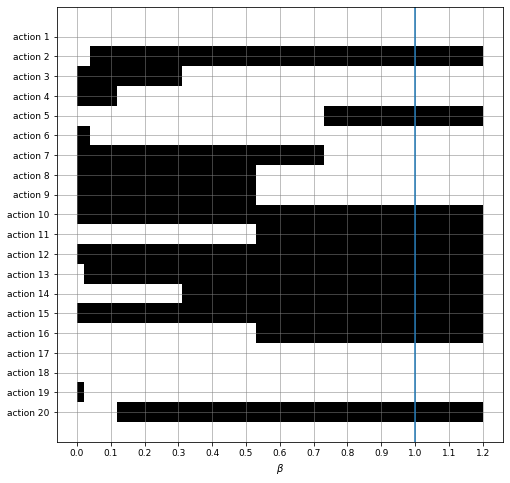

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1.2],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.3,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.3,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.3,0.1), fontsize=9)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlabel(r"$\beta$")
ax.axvline(1)

for project in range(0,20):
    for inter in range(len(betas)):
        fig_loc = (betas[inter], 19-project)
        val = raw_table(s2).iloc[project, inter+1]
        if val==1:
            ax.add_patch(Rectangle(fig_loc, 0.01, 1,
                         edgecolor = 'black',
                         facecolor = 'black',
                         fill=True,
                         lw=0))

plt.show()

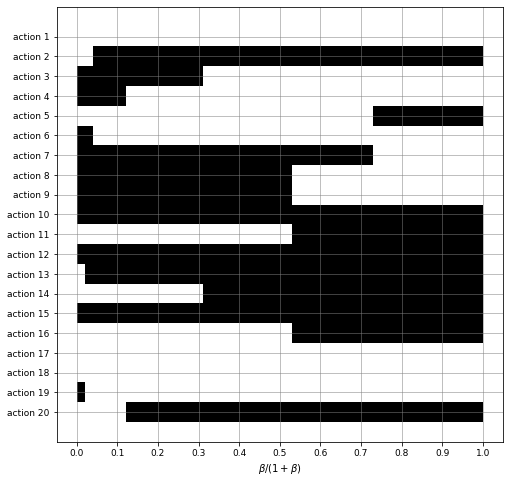

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
#create simple line plot

ax.plot([0, 1],[0, 20], alpha=0)
#ax.title
ax.set_xticks(list(np.arange(0,1.1,0.1)))
ax.set_yticks(np.arange(0.5,20,1))
[ax.axhline(y=i, color="gray", linewidth=0.5) for i in list(np.arange(0.5,20,1))]
[ax.axvline(x=i, color="gray", linewidth=0.5) for i in list(np.arange(0,1.1,0.1))]

ax.set_yticklabels(y_ticks_labels[::-1], fontsize=9)
ax.set_xticklabels(np.arange(0,1.1,0.1), fontsize=9)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlabel(r"$\beta/(1+\beta)$")

for project in range(0,20):
    for inter in range(len(betas)):
        fig_loc = (betas[inter], 19-project)
        val = raw_table(s2).iloc[project, inter+1]
        if val==1:
            ax.add_patch(Rectangle(fig_loc, 0.01, 1,
                         edgecolor = 'black',
                         facecolor = 'black',
                         fill=True,
                         lw=0))

plt.show()

In [142]:
draw_table2(s2).to_csv("67_33_50.csv", sep=";") #[0.67, 0.33], 0.5
draw_table2(s1).to_csv("50_50_50.csv", sep=";") #[0.5, 0.5], 0.5
draw_table2(s3).to_csv("100_0_50.csv", sep=";") #[1,0], 0.5
draw_table2(s5).to_csv("67_33_25.csv", sep=";") #[0.67, 0.33], 0.25
draw_table2(s6).to_csv("67_33_75.csv", sep=";") #[0.67, 0.33], 0.75


In [24]:
len(s2.optimal_portfolios)

1010

In [ ]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [ ]:
draw_graph(s1)

In [ ]:
df = draw_table(s2)

In [ ]:
df.style.applymap(lambda x: "background-color: green" if x>0 else "background-color: white")

In [ ]:
draw_graph(s2)

In [ ]:
dict_values = []

for pf in s2.optimal_portfolios:
    dict_values.append(list(pf.values())[:20])
d2 = dict(zip(s2.interaction_effects_dict.keys(), dict_values[1:]))

In [ ]:
np.array(d2[0]) - np.array(d2[9])

In [ ]:
def draw_table(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    d3 = pd.DataFrame(d2)
    d3.columns = [round(x, 2) for x in d3.columns]
    d3 = d3.astype(int)
    d3 = d3.set_index(pd.Index(list(range(1,21))))
    return d3

In [ ]:
draw_table(s2)

In [ ]:
def draw_graph(p):
    dict_values = []

    for pf in p.optimal_portfolios:
        dict_values.append(list(pf.values())[:20])
    d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
    
    diff_dict = {}
    for k,v in d2.items():
        diff_dict[k] = np.sum(abs(np.array(d2[0])-np.array(v)))
    plt.plot(diff_dict.keys(), diff_dict.values())
    plt.xlabel(r"$\beta$")
    
    plt.ylabel("")

In [ ]:
draw_graph(s2)

In [ ]:
draw_graph(s1)

In [ ]:
draw_graph(s3)

In [ ]:
p1[0].describe()

In [ ]:
p2[0].describe()

In [ ]:
p3[0].describe()

In [ ]:
draw_graph(s4)

In [ ]:
draw_graph(s5)

In [ ]:
draw_graph(s6)

In [ ]:
dict_values = []

for pf in p.optimal_portfolios:
    dict_values.append(list(pf.values())[:20])

In [ ]:
d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))

In [ ]:
d3 = pd.DataFrame(d2)
d3.columns = [round(x, 1) for x in d3.columns]
d3 = d3.astype(int)

In [ ]:
d3.style.applymap(lambda x: "background-color: blue" if x >0 else 'background-color: white')

In [ ]:
diff_dict = {}
for k,v in d2.items():
    diff_dict[k] = np.sum(abs(np.array(d2[0])-np.array(v)))

In [ ]:
plt.plot(diff_dict.keys(), diff_dict.values())
plt.xlabel("$\beta$")
plt.ylabel("Number of different projects selected")

In [ ]:
dict_values = []

for pf in p.optimal_portfolios:
    dict_values.append(list(pf.values())[20:])
    
d2 = dict(zip(p.interaction_effects_dict.keys(), dict_values[1:]))
d3 = pd.DataFrame(d2)
d3.columns = [round(x, 1) for x in d3.columns]
d3 = d3.astype(int)
d3.style.applymap(lambda x: "background-color: blue" if x >0 else 'background-color: white')

In [ ]:
np.sum(abs(np.array(d2[0])-np.array(d2[0.1])))

In [ ]:
len(p.interaction_effects_dict.keys())

In [ ]:
len(p.optimal_portfolios[1:])

In [ ]:
list(p.optimal_portfolios[13].values())[:20]

In [ ]:
np.dot([1,2,3], [0,1,0])

In [ ]:
p.optimal_portfolios[2]

In [ ]:
x = np.dot(list(p.optimal_portfolios[3].values())[:20], p.project_values)
y = np.dot(list(p.optimal_portfolios[3].values())[20:], p.interaction_effects_dict[0.2])
x+y

In [ ]:
p.optimal_values